In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv("../titanic_files/train.csv")
df_test = pd.read_csv("../titanic_files/test.csv")
df_gender_sub = pd.read_csv("../titanic_files/gender_submission.csv")

In [ ]:
df_train.describe()

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)
#df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False).plot(kind='bar', xlabel='Pclass')


In [ ]:
df_train.columns

(array([[233.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.],
        [314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 577.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

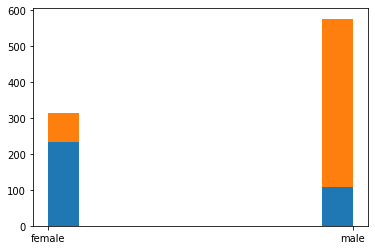

In [29]:
plt.hist([df_train[df_train['Survived']==1]['Sex'],df_train[df_train['Survived']==0]['Sex']], stacked=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.histplot(x = "Age", data = df_train,bins=20)
plt.title("Histogram (Age)")
plt.show()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train.Age = df_train.Age.fillna(df_train.Age.mean())

In [ ]:
df_train[df_train.Embarked.isnull()]

In [ ]:
df_train.Embarked = df_train.Embarked.fillna(method='ffill')

In [ ]:
for cols in ['Survived','Pclass','Sex','SibSp','Parch','Embarked']:
    print(np.unique(df_train[cols]))

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


col_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),['Sex','Embarked']),
    remainder='passthrough')

pip = make_pipeline(col_trans,LinearRegression())

In [ ]:
X, y = df_train[['Pclass','Sex','Age','SibSp','Parch','Embarked']],df_train['Survived']

In [ ]:
model = pip.fit(X,y)

In [ ]:
df_test.Age = pd.to_numeric(df_test.Age , errors = 'coerce')
df_test.Age = df_test.Age.fillna(df_test.Age.mean())

In [ ]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

preds = model.predict(df_test[columns])

In [ ]:
count = 0
for i in range(0,len(preds)):
    if(int(preds[i]) == df_gender_sub.iloc[i,1]):
        count += 1
print(count)

In [ ]:
df_test_results = df_test[['PassengerId']]

In [ ]:
preds = preds.astype(int)

In [ ]:
df_test_results['Survived'] = preds

In [ ]:
df_test_results.to_csv('./kaggle-titanic/Titanic_test_results.csv', index=False)